In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import math
from scipy.optimize import curve_fit


Dynamo Number: -10.0


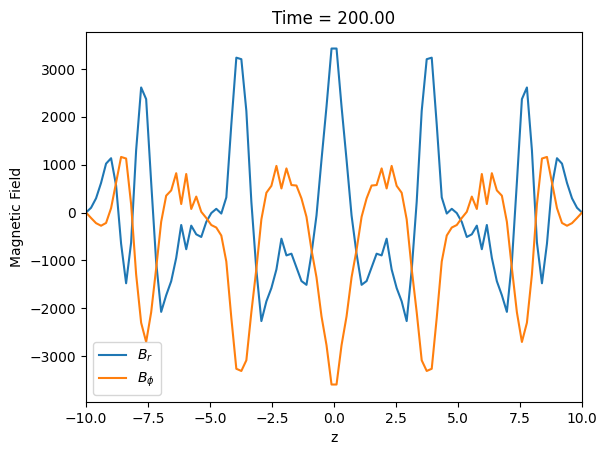

In [89]:
# Parameters
h = 1.0   
alpha_0 = 1.0  
q = 1.0   
Omega = 1.0  
eta_t = 0.1  

#grid parameters
L = 10.0  
N = 100   
dt = 0.01 
T = 200  
max_frames = int(T / (100 * dt))
nt=int(T/dt)
Tlis = np.linspace(0, T, max_frames)
dynamo_number = - (q * Omega * alpha_0 * h**3) / eta_t
print("Dynamo Number:", dynamo_number)
BrvT =np.zeros((max_frames,N))
BphivT = np.zeros((max_frames,N))
dz = 2*L / (N - 1)
z = np.linspace(-L, L, N)
def initial_condition(x):
    return 50 * np.sin(np.pi *((x+L)/(2*L)))
B_r0 = np.zeros(N)
B_phi0 = np.zeros(N)
B_r0=initial_condition(z)
B_phi0=initial_condition(z)

BrvT[0,:]=B_r0
BphivT[0,:]=B_phi0

def alpha(z):
    return np.sin(np.pi * z / 2)
def dBr_dz(B_r):
    return np.gradient(B_r, dz)
def d2Br_dz2(B_r):
    return np.gradient(np.gradient(B_r, dz), dz)
def d2Bphi_dz2(B_phi):
    return np.gradient(np.gradient(B_phi, dz), dz)
def dBrdt(B_r, B_phi):
    return - (h * alpha_0 / eta_t) * dBr_dz(B_phi * alpha(z)) + d2Br_dz2(B_r)
def dBphidt(B_r, B_phi):
    return - (h**2 * q * Omega / eta_t) * B_r + d2Bphi_dz2(B_phi)

def rk4_step(B_r, B_phi):
    k1_r = dt * dBrdt(B_r, B_phi)    
    k1_phi = dt * dBphidt(B_r, B_phi)    
    
    k2_r = dt * dBrdt(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)
    k2_phi = dt * dBphidt(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)
    
    k3_r = dt * dBrdt(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)
    k3_phi = dt * dBphidt(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)    
    
    k4_r = dt * dBrdt(B_r + k3_r, B_phi + k3_phi)    
    k4_phi = dt * dBphidt(B_r + k3_r, B_phi + k3_phi)
    
    B_r_new = B_r + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    B_phi_new = B_phi + (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi) / 6
    
    B_r_new[0] = 0
    B_r_new[-1] = 0
    B_phi_new[0] = 0
    B_phi_new[-1] = 0
    
    return B_r_new, B_phi_new

def update_plot1(frame):
    global B_r0, B_phi0,BrvT,BphivT
    B_r0, B_phi0 = rk4_step(B_r0, B_phi0)
    BrvT[frame,:]=B_r0.copy()
    BphivT[frame,:]=B_phi0.copy()
    line_br.set_ydata(B_r0)
    line_bphi.set_ydata(B_phi0)
    ax.set_title(f'Time = {(frame+1) * 100 * dt:.2f}')
    min_B = np.min([np.min(B_r0), np.min(B_phi0)])
    max_B = np.max([np.max(B_r0), np.max(B_phi0)])
    ax.set_ylim(1.1*min_B , 1.1*max_B)    
    return line_br, line_bphi
"""def update_plot2(frame):
    global B_r0, B_phi0,BrvT,BphivT
    for i in range(0,frame,1):
        B_r0, B_phi0 = rk4_step(B_r0, B_phi0)
        BrvT[i+1,:]=B_r0.copy()
        BphivT[i+1,:]=B_phi0.copy()
    line_br.set_ydata(B_r0)
    line_bphi.set_ydata(B_phi0)
    ax.set_title(f'Time = {(frame+1) * 100 * dt:.2f}')
    min_B = np.min([np.min(B_r0), np.min(B_phi0)])
    max_B = np.max([np.max(B_r0), np.max(B_phi0)])
    ax.set_ylim(1.1*min_B , 1.1*max_B)    
    return line_br, line_bphi"""
    
fig, ax = plt.subplots()
ax.set_xlim(-L, L)
ax.set_xlabel('z')
ax.set_ylabel('Magnetic Field')
ax.set_title('Magnetic Field Evolution')

line_br, = ax.plot(z, B_r0, label='$B_r$')
line_bphi, = ax.plot(z, B_phi0, label='$B_{\phi}$')
ax.legend()
ani = FuncAnimation(fig, update_plot1, frames=max_frames, interval=200, blit=True)#this also doubles as the main loop
ani.save(f'magnetic_field_evolution(T={T}).gif', writer='pillow')
plt.show()


In [ ]:

# Parameters
h = 1.0   
alpha_0 = 1.0  
q = 1.0   
Omega = 1.0  
eta_t = 0.1  

#grid parameters
L = 10.0  
N = 100   
dt = 0.01 
T = 200  
def get_B_r_and_B_phi(eta_t=1.0,h = 1.0,alpha_0 = 1.0,q = 1.0,Omega = 1.0,L = 10.0,N = 100,dt = 0.01,T = 200):
max_frames = int(T / (100 * dt))
nt=int(T/dt)
Tlis = np.linspace(0, T, max_frames)
dynamo_number = - (q * Omega * alpha_0 * h**3) / eta_t
print("Dynamo Number:", dynamo_number)
BrvT =np.zeros((max_frames,N))
BphivT = np.zeros((max_frames,N))
dz = 2*L / (N - 1)
z = np.linspace(-L, L, N)
def initial_condition(x):
    return 50 * np.sin(np.pi *((x+L)/(2*L)))
B_r0 = np.zeros(N)
B_phi0 = np.zeros(N)
B_r0=initial_condition(z)
B_phi0=initial_condition(z)

BrvT[0,:]=B_r0
BphivT[0,:]=B_phi0

def alpha(z):
    return np.sin(np.pi * z / 2)
def dBr_dz(B_r):
    return np.gradient(B_r, dz)
def d2Br_dz2(B_r):
    return np.gradient(np.gradient(B_r, dz), dz)
def d2Bphi_dz2(B_phi):
    return np.gradient(np.gradient(B_phi, dz), dz)
def dBrdt(B_r, B_phi):
    return - (h * alpha_0 / eta_t) * dBr_dz(B_phi * alpha(z)) + d2Br_dz2(B_r)
def dBphidt(B_r, B_phi):
    return - (h**2 * q * Omega / eta_t) * B_r + d2Bphi_dz2(B_phi)

def rk4_step(B_r, B_phi):
    k1_r = dt * dBrdt(B_r, B_phi)    
    k1_phi = dt * dBphidt(B_r, B_phi)    
    
    k2_r = dt * dBrdt(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)
    k2_phi = dt * dBphidt(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)
    
    k3_r = dt * dBrdt(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)
    k3_phi = dt * dBphidt(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)    
    
    k4_r = dt * dBrdt(B_r + k3_r, B_phi + k3_phi)    
    k4_phi = dt * dBphidt(B_r + k3_r, B_phi + k3_phi)
    
    B_r_new = B_r + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    B_phi_new = B_phi + (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi) / 6
    
    B_r_new[0] = 0
    B_r_new[-1] = 0
    B_phi_new[0] = 0
    B_phi_new[-1] = 0
    
    return B_r_new, B_phi_new

def update_plot1(frame):
    global B_r0, B_phi0,BrvT,BphivT
    B_r0, B_phi0 = rk4_step(B_r0, B_phi0)
    BrvT[frame,:]=B_r0.copy()
    BphivT[frame,:]=B_phi0.copy()
    line_br.set_ydata(B_r0)
    line_bphi.set_ydata(B_phi0)
    ax.set_title(f'Time = {(frame+1) * 100 * dt:.2f}')
    min_B = np.min([np.min(B_r0), np.min(B_phi0)])
    max_B = np.max([np.max(B_r0), np.max(B_phi0)])
    ax.set_ylim(1.1*min_B , 1.1*max_B)    
    return line_br, line_bphi
"""def update_plot2(frame):
    global B_r0, B_phi0,BrvT,BphivT
    for i in range(0,frame,1):
        B_r0, B_phi0 = rk4_step(B_r0, B_phi0)
        BrvT[i+1,:]=B_r0.copy()
        BphivT[i+1,:]=B_phi0.copy()
    line_br.set_ydata(B_r0)
    line_bphi.set_ydata(B_phi0)
    ax.set_title(f'Time = {(frame+1) * 100 * dt:.2f}')
    min_B = np.min([np.min(B_r0), np.min(B_phi0)])
    max_B = np.max([np.max(B_r0), np.max(B_phi0)])
    ax.set_ylim(1.1*min_B , 1.1*max_B)    
    return line_br, line_bphi"""
    
fig, ax = plt.subplots()
ax.set_xlim(-L, L)
ax.set_xlabel('z')
ax.set_ylabel('Magnetic Field')
ax.set_title('Magnetic Field Evolution')

line_br, = ax.plot(z, B_r0, label='$B_r$')
line_bphi, = ax.plot(z, B_phi0, label='$B_{\phi}$')
ax.legend()
ani = FuncAnimation(fig, update_plot1, frames=max_frames, interval=200, blit=True)#this also doubles as the main loop
ani.save(f'magnetic_field_evolution(T={T}).gif', writer='pillow')
plt.show()


In [86]:
index=50
b_fit=[]
for i in range(0,len(BrvT)):
    B=BrvT[i]
    b_fit.append(B[index])

def exponential_func(t, B0, gamma):
    return B0 * np.exp(gamma * t)
Tlis = np.linspace(0, T, max_frames)
popt, pcov = curve_fit(exponential_func, Tlis, b_fit)
print("Gamma from fit:", popt[1])#global fit
gamma=popt[1]

Gamma from fit: 1.0


C:\Users\DeLL\AppData\Local\Temp\ipykernel_10968\2734435111.py:1: RuntimeWarning: invalid value encountered in log
  log_B = np.log(b_fit)


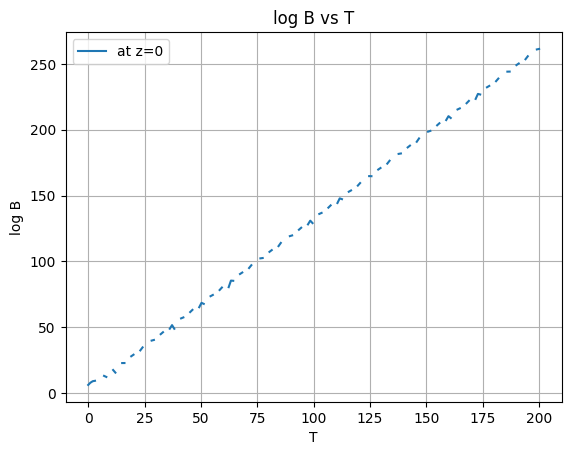

In [87]:
log_B = np.log(b_fit)
plt.plot(Tlis,log_B,label="at z=0")
plt.ylabel("log B")
plt.xlabel("T")
plt.title("log B vs T")
plt.grid()
plt.legend()
plt.show()

Slope of the first segment: nan
Slope of the second segment: nan


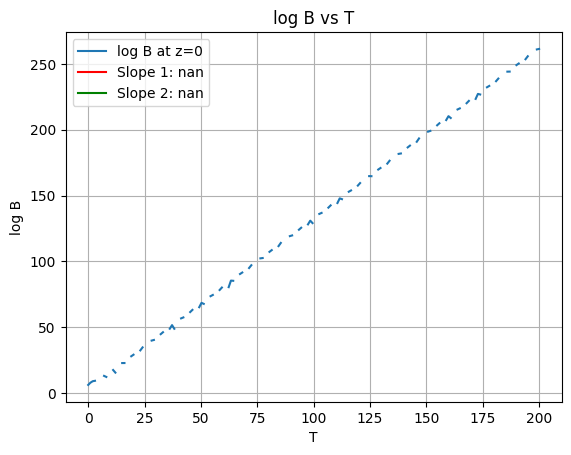

In [88]:
def onevarsum(a):#finds sum of 1 variable
    sum1=0
    for i in range(len(a)):
        sum1+=a[i]
    return sum1
def twovarsum(a,b):
    sum1=0
    for i in range(len(a)):
        sum1+=(a[i]*b[i])
    return sum1
def interceptandslope(x,y):#least square fit
    s=len(x)
    sx=onevarsum(x)
    sxx=twovarsum(x,x)
    sy=onevarsum(y)
    sxy=twovarsum(x,y)
    delt=(s*sxx-(sx**2))
    intercept=(sxx*sy-sx*sxy)/delt
    slop=(sxy*s-sx*sy)/delt
    errslope=(s/delt)**0.5
    errinter=(sxx/delt)**0.5
    return(slop,intercept)#,errinter,errslope
slope1, intercept1 = interceptandslope(Tlis[:split_index], log_B[:split_index])
slope2, intercept2 = interceptandslope(Tlis[split_index:], log_B[split_index:])
print("Slope of the first segment:", slope1)#these are local slopes in time
print("Slope of the second segment:", slope2)
plt.plot(Tlis, log_B, label="log B at z=0")
plt.plot(Tlis[:split_index], slope1 * Tlis[:split_index] + intercept1, color='red', label=f"Slope 1: {slope1:.5f}")
plt.plot(Tlis[split_index:], slope2 * Tlis[split_index:] + intercept2, color='green', label=f"Slope 2: {slope2:.5f}")

plt.ylabel("log B")
plt.xlabel("T")
plt.title("log B vs T")
plt.grid()
plt.legend()
plt.show()

In [ ]:
def find_critical_dynamo_number(eta_t_values):
    critical_dynamo_numbers = []
    for eta_t in eta_t_values:
        B_r0 = initial_condition(z)
        B_phi0 = initial_condition(z)        
        
        for _ in range(max_frames):
            B_r0, B_phi0 = rk4_step(B_r0, B_phi0)
        
        magnetic_field_no_z = np.sqrt(B_r0 ** 2 + B_phi0 ** 2)#if this value decreases we can say that the dynamo is decaying and thus is not growing
        m_e.append(magnetic_field_no_z)
        if magnetic_energy > 1e-6:  # Adjust the threshold as needed
            # If magnetic energy grows, append the eta_t value to the critical_dynamo_numbers list
            critical_dynamo_numbers.append(eta_t)
        else:
            # If magnetic energy does not grow, break the loop
            break
    
    # Return the critical dynamo number
    if critical_dynamo_numbers:
        return max(critical_dynamo_numbers)
    else:
        return None

# Define a range of eta_t values to iterate over
eta_t_values = np.linspace(0.01, 10.0, 100)
print(eta_t_values)
# Find the critical dynamo number
critical_dynamo_number = find_critical_dynamo_number(eta_t_values)

# Print the critical dynamo number
if critical_dynamo_number is not None:
    print("Critical dynamo number:", critical_dynamo_number)
else:
    print("Dynamo action is not present in the given range of eta_t values.")
